In [6]:
import matplotlib.pylab as plt
import numpy as np
plt.style.use("/afs/ihep.ac.cn/users/l/luoxj/Style/Paper.mplstyle")
%config InlineBackend.figure_format = 'svg'
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")

In [7]:
import sys
sys.path.append("/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/")
from importlib import reload

import PlotTrackOfProcess
reload(PlotTrackOfProcess)
from PlotTrackOfProcess import PlotTrackOfProcess

track_tool = PlotTrackOfProcess()
check_result_with_track = False
v_particles = [ "e-", "gamma" ]
# "K40", "Mn54"]
# v_particles = [  "Ge68" ]
# v_particles = [ "Cs137"]
v_name_files = ["user-detsim-_no_optical.root"]*len(v_particles)
v_neutron_filter = [False]*len(v_particles)
template_path = \
    "root://junoeos01.ihep.ac.cn//eos/juno/user/luoxj/Calibration_for_time_constants/{}/no_optical/{}"


In [8]:
import tqdm

dir_v_dE_dx_average = {}
dir_v_dE_dx_average_with_quench = {}
dir_v_equen = {}
dir_v_edep = {}
dir_index_evtID_of_equen = {}
for i,particle in enumerate(v_particles):
    name_file_full_path = template_path.format(particle,
                            v_name_files[i])
    # name_file_full_path = template_path.format(particle, v_name_files[i])
    track_tool.SetDataset(name_file_full_path)
    index_evtID_of_equen = track_tool.GetEvtIDOfDepTree()
    entries = track_tool.GetTotalEntries()
    v_dE_dx = []
    v_dE_dx_with_quench = []
    # v_equen = track_tool.Get_v_Equen(filter_n_capture=(particle=="neutron" or particle=="AmC"))
    # v_edep = track_tool.Get_v_Edep(filter_n_capture=(particle=="neutron" or particle=="AmC"))
    v_equen = track_tool.Get_v_Equen(filter_n_capture=False)
    v_edep = track_tool.Get_v_Edep(filter_n_capture=False)
    # for j_entry in tqdm.trange(entries)[:1000]:
    # entries = 20000
    n_figure_track = 0
    for j_entry in tqdm.trange(entries):
        # equen = track_tool.GetEquen(j_entry, filter_n_capture=True)
        dE_dx_average = track_tool.Get_Average_dE_dx(j_entry)
        dE_dx_average_with_quench = track_tool.Get_Average_dE_dx(j_entry,times_quench_factor=True)
        v_dE_dx.append(dE_dx_average)
        v_dE_dx_with_quench.append(dE_dx_average_with_quench)

        # if n_figure_track>10 and check_result_with_track:
        #     break
    dir_v_dE_dx_average[particle] = np.array(v_dE_dx)[index_evtID_of_equen]
    dir_v_equen[particle] = v_equen
    dir_v_dE_dx_average_with_quench[particle] = np.array(v_dE_dx_with_quench)[index_evtID_of_equen]
    dir_v_edep[particle] = v_edep
    dir_index_evtID_of_equen[particle] = index_evtID_of_equen

  1%|          | 693/100000 [00:19<49:48, 33.24it/s]  /afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/PlotTrackOfProcess.py:385: RuntimeWarning: invalid value encountered in true_divide
  one_track_dE_dx = np.nan_to_num(one_track_dE/one_track_dx)
  1%|          | 693/100000 [00:17<40:15, 41.12it/s]/afs/ihep.ac.cn/users/l/luoxj/root_tool/python_script/PlotTrackOfProcess.py:385: RuntimeWarning: invalid value encountered in true_divide
  one_track_dE_dx = np.nan_to_num(one_track_dE/one_track_dx)
100%|██████████| 100000/100000 [53:29<00:00, 31.16it/s] 


Text(0.5, 0, '$E_{quench}$ [ MeV ]')

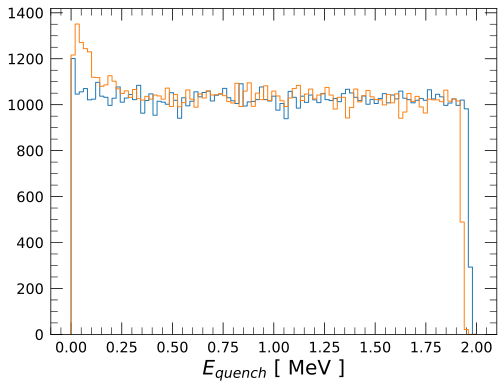

Text(0.5, 0, '$E_{quench}$ [ MeV ]')

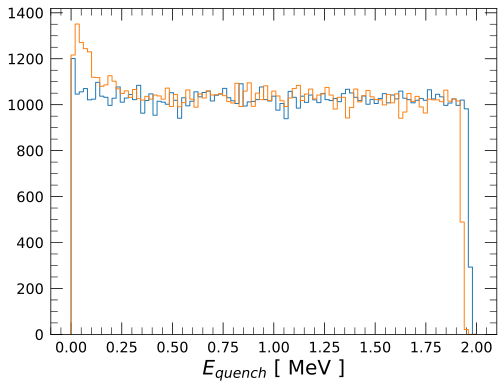

In [9]:
for key in dir_v_equen.keys():
    plt.hist(dir_v_equen[key],histtype="step",bins=np.linspace(0,2,100),
             label=key)
plt.xlabel("$E_{quench}$ [ MeV ]")

x:	 [0.00510204 0.01530612 0.0255102  0.03571429 0.04591837 0.05612245
 0.06632653 0.07653061 0.08673469 0.09693878 0.10714286 0.11734694
 0.12755102 0.1377551  0.14795918 0.15816327 0.16836735 0.17857143
 0.18877551 0.19897959 0.20918367 0.21938776 0.22959184 0.23979592
 0.25       0.26020408 0.27040816 0.28061224 0.29081633 0.30102041
 0.31122449 0.32142857 0.33163265 0.34183673 0.35204082 0.3622449
 0.37244898 0.38265306 0.39285714 0.40306122 0.41326531 0.42346939
 0.43367347 0.44387755 0.45408163 0.46428571 0.4744898  0.48469388
 0.49489796]
y:	 [5.21560237 2.46323529 1.66395642 1.31203301 1.09264778 0.9256423
 0.81966891 0.85107161 0.84733124 0.7635886  0.73019851 0.69191003
 0.63570684 0.64397826 0.62670738 0.58772626 0.56333776 0.55747723
 0.53662899 0.53814383 0.52843273 0.52527829 0.52037051 0.50794904
 0.50390527 0.4904167  0.48504333 0.47965059 0.45651774 0.42491042
 0.42222401 0.39508111 0.39658795 0.38505583 0.37853851 0.36885246
 0.36020211 0.35321821 0.36181648 0.3523596

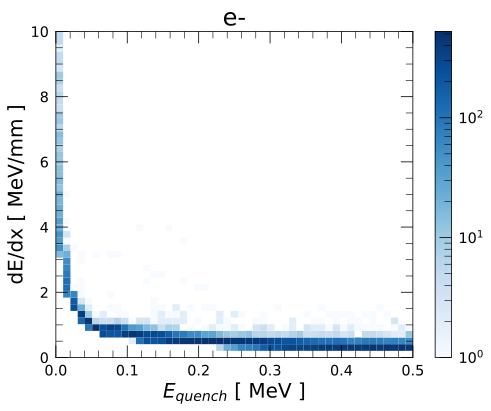

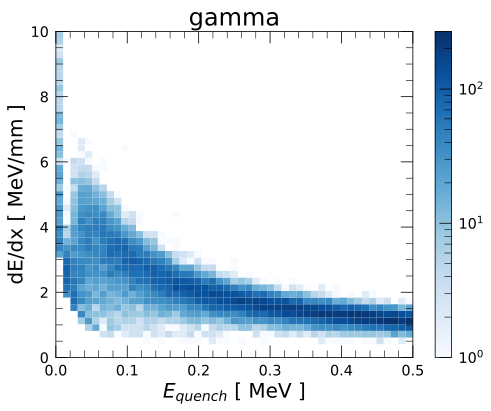

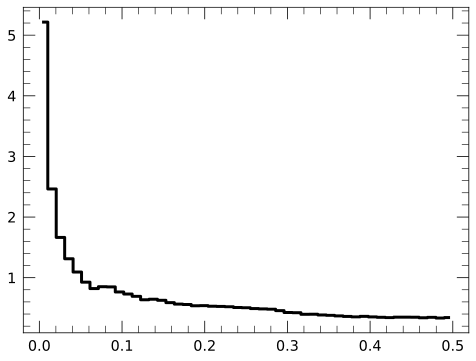

In [39]:
x_max = 0.5
y_max = 10
from matplotlib.colors import LogNorm
dir_hist2d = {}
for key in dir_v_equen.keys():
    plt.figure()
    dir_hist2d[key] = plt.hist2d(dir_v_equen[key],dir_v_dE_dx_average_with_quench[key],
               bins=(np.linspace(0,x_max,50),np.linspace(0,y_max,50)),
               cmap="Blues",norm=LogNorm())
    plt.xlabel("$E_{quench}$ [ MeV ]")
    plt.ylabel("dE/dx [ MeV/mm ]")
    plt.colorbar()
    plt.title(key)
    # plt.savefig(f"./figure/{key}_E_{x_max}_dE_dx_{y_max}.png")

x_center:	 [0.00510204 0.01530612 0.0255102  0.03571429 0.04591837 0.05612245
 0.06632653 0.07653061 0.08673469 0.09693878 0.10714286 0.11734694
 0.12755102 0.1377551  0.14795918 0.15816327 0.16836735 0.17857143
 0.18877551 0.19897959 0.20918367 0.21938776 0.22959184 0.23979592
 0.25       0.26020408 0.27040816 0.28061224 0.29081633 0.30102041
 0.31122449 0.32142857 0.33163265 0.34183673 0.35204082 0.3622449
 0.37244898 0.38265306 0.39285714 0.40306122 0.41326531 0.42346939
 0.43367347 0.44387755 0.45408163 0.46428571 0.4744898  0.48469388
 0.49489796]
y:	 [5.21560237 2.46323529 1.66395642 1.31203301 1.09264778 0.9256423
 0.81966891 0.85107161 0.84733124 0.7635886  0.73019851 0.69191003
 0.63570684 0.64397826 0.62670738 0.58772626 0.56333776 0.55747723
 0.53662899 0.53814383 0.52843273 0.52527829 0.52037051 0.50794904
 0.50390527 0.4904167  0.48504333 0.47965059 0.45651774 0.42491042
 0.42222401 0.39508111 0.39658795 0.38505583 0.37853851 0.36885246
 0.36020211 0.35321821 0.36181648 0.

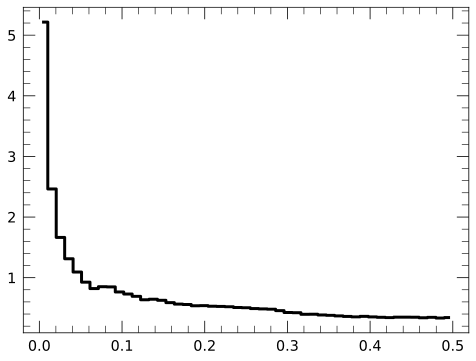

In [41]:
plt.figure()
from HistTools import GetHist2DProjectionY
# print(dir_hist2d["e-"][0])
(x,y) = GetHist2DProjectionY(dir_hist2d["e-"][0], dir_hist2d["e-"][1], dir_hist2d["e-"][2],
                     plot=True)
print("x_center:\t", x)
print("y:\t", y)